# Logistic Regression

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, precision_recall_fscore_support

## Loading Wine Dataset and creating dataframe

In [10]:
df_wine = pd.read_csv('./wine.data.csv')

features = df_wine.loc[:, df_wine.columns != 'Class']
target = df_wine.Class

target_names = df_wine['Class'].unique()
print(target_names)
df_wine.describe()

[1 2 3]


Class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

### Through the info() function we can see that there are no null elements in any column, and all are of the type float.

In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

## Visualising how the data is divided between the 3 classes

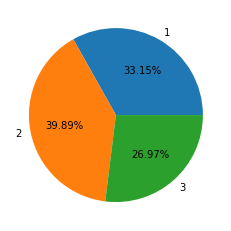

In [11]:
classes = df_wine.groupby('Class')['Class'].count()

plt.pie(classes, labels=target_names, autopct='%.2f%%')
plt.show()

## Standardising the Data

In [22]:
standardized = scale(features)
df_std = pd.DataFrame(standardized, columns=features.columns)
df_std['Class'] = target.copy() 
df_std.describe()

Alcohol    Malic acid           Ash  Alcalinity of ash  \
count  1.780000e+02  1.780000e+02  1.780000e+02       1.780000e+02   
mean  -8.619821e-16 -8.357859e-17 -8.657245e-16      -1.160121e-16   
std    1.002821e+00  1.002821e+00  1.002821e+00       1.002821e+00   
min   -2.434235e+00 -1.432983e+00 -3.679162e+00      -2.671018e+00   
25%   -7.882448e-01 -6.587486e-01 -5.721225e-01      -6.891372e-01   
50%    6.099988e-02 -4.231120e-01 -2.382132e-02       1.518295e-03   
75%    8.361286e-01  6.697929e-01  6.981085e-01       6.020883e-01   
max    2.259772e+00  3.109192e+00  3.156325e+00       3.154511e+00   

          Magnesium  Total phenols    Flavanoids  Nonflavanoid phenols  \
count  1.780000e+02   1.780000e+02  1.780000e+02          1.780000e+02   
mean  -1.995907e-17  -2.972030e-16 -4.016762e-16          4.079134e-16   
std    1.002821e+00   1.002821e+00  1.002821e+00          1.002821e+00   
min   -2.088255e+00  -2.107246e+00 -1.695971e+00         -1.868234e+00   
25%   -8.244151e-01  -8.854682e-01 -8.275393e-01         -7.401412e-01   
50%   -1.222817e-01   9.595986e-02  1.061497e-01         -1.760948e-01   
75%    5.096384e-01   8.089974e-01  8.490851e-01          6.095413e-01   
max    4.371372e+00   2.539515e+00  3.062832e+00          2.402403e+00   

       Proanthocyanins  Color intensity           Hue  \
count     1.780000e+02     1.780000e+02  1.780000e+02   
mean     -1.699639e-16    -1.122697e-17  3.717376e-16   
std       1.002821e+00     1.002821e+00  1.002821e+00   
min      -2.069034e+00    -1.634288e+00 -2.094732e+00   
25%      -5.972835e-01    -7.951025e-01 -7.675624e-01   
50%      -6.289785e-02    -1.592246e-01  3.312687e-02   
75%       6.291754e-01     4.939560e-01  7.131644e-01   
max       3.485073e+00     3.435432e+00  3.301694e+00   

       OD280/OD315 of diluted wines       Proline       Class  
count                  1.780000e+02  1.780000e+02  178.000000  
mean                   2.919013e-16 -7.484650e-18    1.938202  
std                    1.002821e+00  1.002821e+00    0.775035  
min                   -1.895054e+00 -1.493188e+00    1.000000  
25%                   -9.522483e-01 -7.846378e-01    1.000000  
50%                    2.377348e-01 -2.337204e-01    2.000000  
75%                    7.885875e-01  7.582494e-01    3.000000  
max                    1.960915e+00  2.971473e+00    3.000000

### Checking correlation with the TARGET and selecting highly correlated ones.

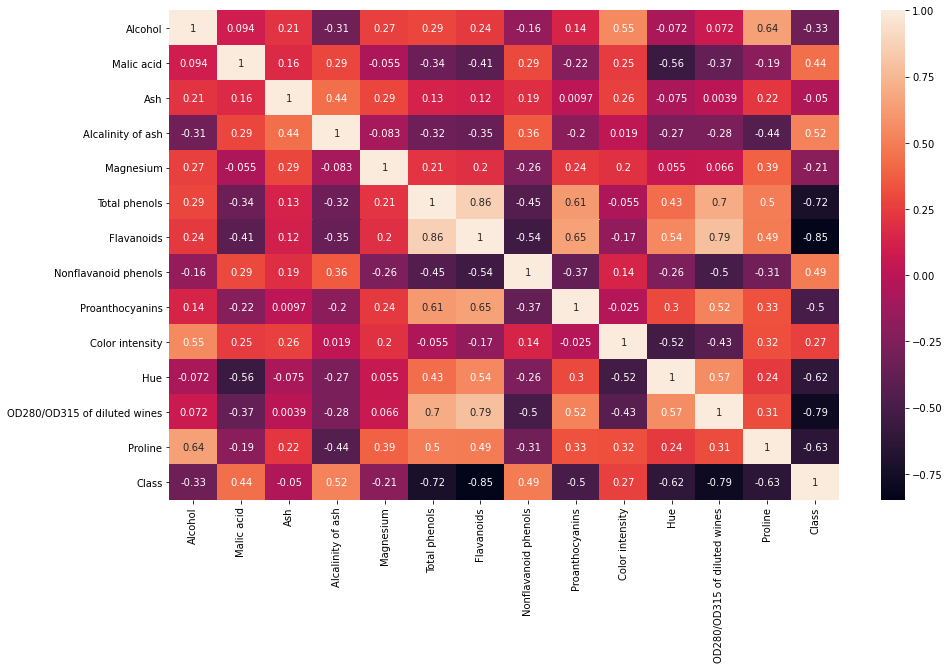

In [23]:
cmat = df_std.corr()
fig, axs = plt.subplots(nrows=1)
fig.set_size_inches(15, 9)
sns.heatmap(cmat, annot=True)
plt.show()

### Checking Multicolinearity between selected columns

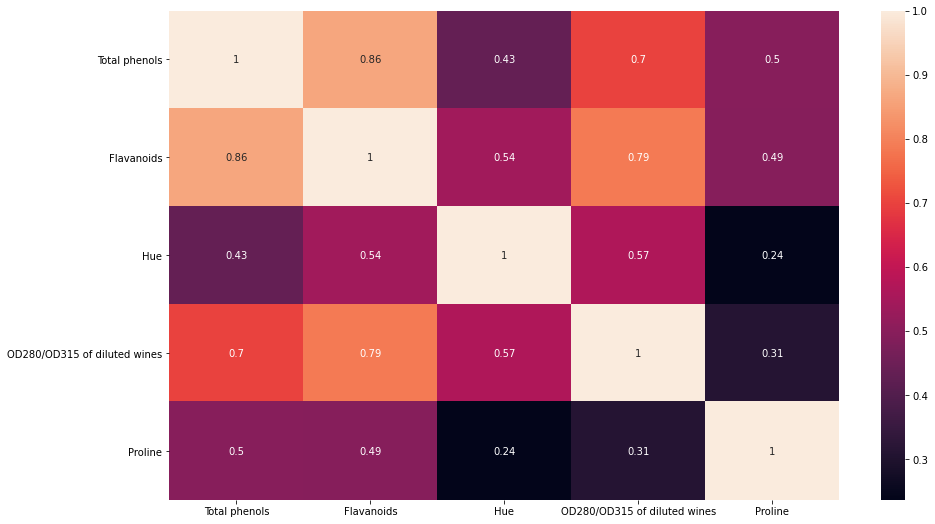

In [25]:
df_intermediate = df_std[['Total phenols', 'Flavanoids', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']]

cmat = df_intermediate.corr()
fig, axs = plt.subplots(nrows=1)
fig.set_size_inches(15, 9)
sns.heatmap(cmat, annot=True)
plt.show()

### Dropping 'total_phenols' column since it is highly correlated with 'flavanoids' and 'od280/od315_of_diluted_wines'

In [26]:
df_final = df_std[['Hue', 'OD280/OD315 of diluted wines', 'Proline', 'Class']]

## Visualisations over the 3 classes for each selected attribute

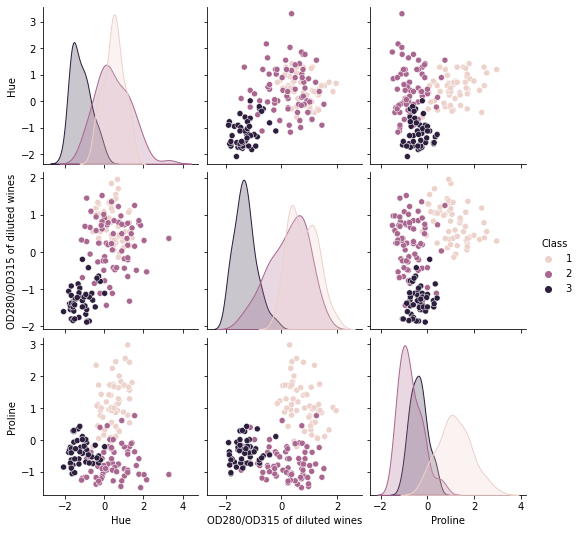

In [28]:
sns.pairplot(df_final, hue='Class')

## Distributions

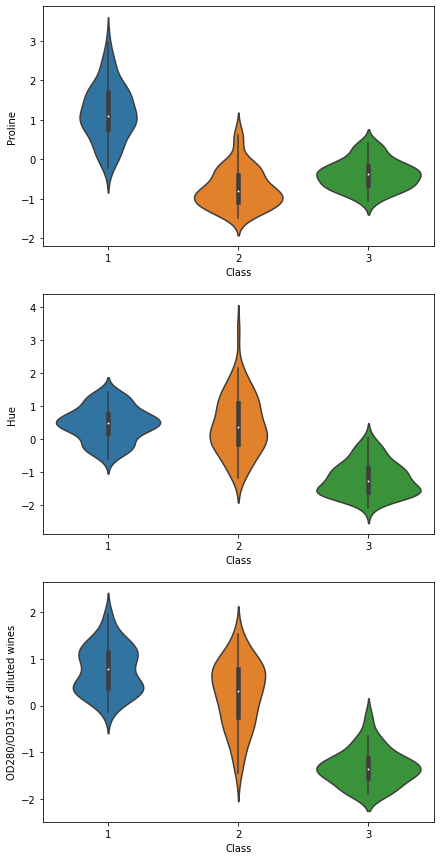

In [30]:
fig, axs = plt.subplots(nrows=3)
fig.set_size_inches(7, 15)
# p1 = sns.violinplot(x='target', y='flavanoids', data=df_final, ax=axs[0])
p2 = sns.violinplot(x='Class', y='Hue', data=df_final, ax=axs[1])
p3 = sns.violinplot(x='Class', y='OD280/OD315 of diluted wines', data=df_final, ax=axs[2])
p4 = sns.violinplot(x='Class', y='Proline', data=df_final, ax=axs[0])

## Tain-Test Split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df_final.loc[:, df_final.columns != 'Class'], target, test_size=0.1, random_state=0)

## Creating and training Logistic Regression Model

In [32]:
model = LogisticRegression()
model.fit(x_train, y_train)

print('Model Coefficient : \n', model.coef_)
print('MOdel Intercept : ', model.intercept_)

Model Coefficient : 
 [[ 0.11145796  1.41335974  1.92776915]
 [ 1.16969752  0.36312439 -1.78417496]
 [-1.28115548 -1.77648413 -0.1435942 ]]
MOdel Intercept :  [ 0.04744672  0.88420744 -0.93165416]


## Testing the model

In [33]:
y_predicted = model.predict(x_test)

## Error and Metrics

### MAS, MSE, RMSE

In [34]:
MAE = mean_absolute_error(y_test, y_predicted)
print('MAE  : ', MAE)
MSE = mean_squared_error(y_test, y_predicted)
print('MSE  : ', MSE)
RMSE = np.sqrt(mean_squared_error(y_test, y_predicted))
print('RMSE : ', RMSE)

MAE  :  0.0
MSE  :  0.0
RMSE :  0.0


### Confusion Matrix

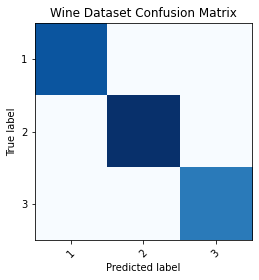

In [35]:
cm = confusion_matrix(y_test, y_predicted)

tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.tight_layout
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Wine Dataset Confusion Matrix')
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.show()

### Accuracy Precision Recall and F-Score

In [36]:
accuracy = accuracy_score(y_test, y_predicted)
print('Model accuracy : ', accuracy)

metric_score = precision_recall_fscore_support(y_test, y_predicted, average='macro')

metric_name = ['precision', 'recall', 'fscore']

for i in range(0, 3):
    print('Model ' + metric_name[i] + ' : ' + str(metric_score[i]))

Model accuracy :  1.0
Model precision : 1.0
Model recall : 1.0
Model fscore : 1.0
